## Table of Content

## 1. Process Of Work

<img src="C:\Users\HP\Desktop\Capstone_project\ProjectPic.png" alt="PROCESS OF WORK" width="600"/>


## 2. Background Research 

## 3. Objective 

## 4. Data Dictionary of Dataset

## 5. Import Important Library

In [1]:
!pip install ydata-profiling

In [2]:
!pip show ydata-profiling

Name: ydata-profiling
Version: 4.6.4
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: C:\Users\HP\anaconda3\Lib\site-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numba, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


In [3]:
!pip install streamlit

In [4]:
!pip show streamlit

Name: streamlit
Version: 1.31.1
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\Users\HP\anaconda3\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, importlib-metadata, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, python-dateutil, requests, rich, tenacity, toml, tornado, typing-extensions, tzlocal, validators, watchdog
Required-by: 


In [5]:
!pip install xgboost

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

# Import Different Algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Check if plot_confusion_matrix is available, if not, import it from sklearn.metrics.plot_confusion_matrix
try:
    from sklearn.metrics import plot_confusion_matrix
except ImportError:
    from sklearn.metrics import ConfusionMatrixDisplay
    def plot_confusion_matrix(estimator, X, y):
        cm = confusion_matrix(y, estimator.predict(X))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

# Check if plot_precision_recall_curve is available, if not, import it from sklearn.metrics.plot_precision_recall_curve
try:
    from sklearn.metrics import plot_precision_recall_curve
except ImportError:
    from sklearn.metrics import PrecisionRecallDisplay
    def plot_precision_recall_curve(estimator, X, y):
        precision, recall, _ = precision_recall_curve(y, estimator.predict_proba(X)[:, 1])
        pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
        pr_display.plot()
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()

# Check if plot_roc_curve is available, if not, import it from sklearn.metrics.plot_roc_curve
try:
    from sklearn.metrics import plot_roc_curve
except ImportError:
    from sklearn.metrics import RocCurveDisplay
    def plot_roc_curve(estimator, X, y):
        fpr, tpr, _ = roc_curve(y, estimator.predict_proba(X)[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
        roc_display.plot()
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.show()

## 6. Import Dataset and EDA

#### 6.1 Import Dataset and analysis using "ydata_profiling" 

In [7]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Capstone_project\heart.csv")

In [8]:
profile = ProfileReport(df, title = 'Heart disease',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.shape

(1025, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

#### 6.2 Exploratory Data Analysis (EDA)

In [13]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

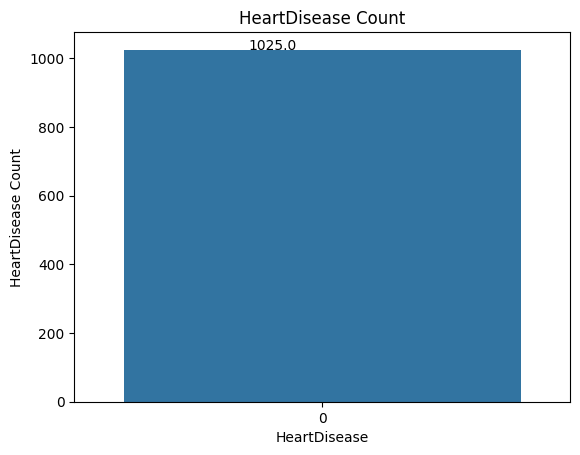

In [14]:
ax=sns.countplot(df['target'])
# Set label for x-axis
ax.set_xlabel( "HeartDisease")

# Set Value for every count
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
# Set label for y-axis
ax.set_ylabel( "HeartDisease Count")
  
# Set title for plot
ax.set_title(  "HeartDisease Count")
# Display figure
plt.show()

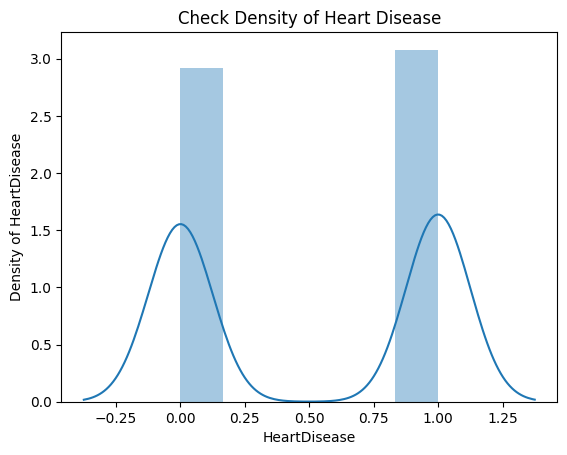

In [15]:
ax=sns.distplot(df['target'])
ax.set_xlabel("HeartDisease")
ax.set_ylabel("Density of HeartDisease")
ax.set_title("Check Density of Heart Disease")
plt.show()

In [16]:
No_HeartDisease  = (138/1025) * 100
HeartDisease =  (165/1025) * 100

print('HeartDisease present are {} percent of total people\'s of datasets'.format(HeartDisease))
print('No HeartDisease are {} percent of total people\'s of datasets'.format(No_HeartDisease))

HeartDisease present are 16.097560975609756 percent of total people's of datasets
No HeartDisease are 13.463414634146343 percent of total people's of datasets


In [17]:
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

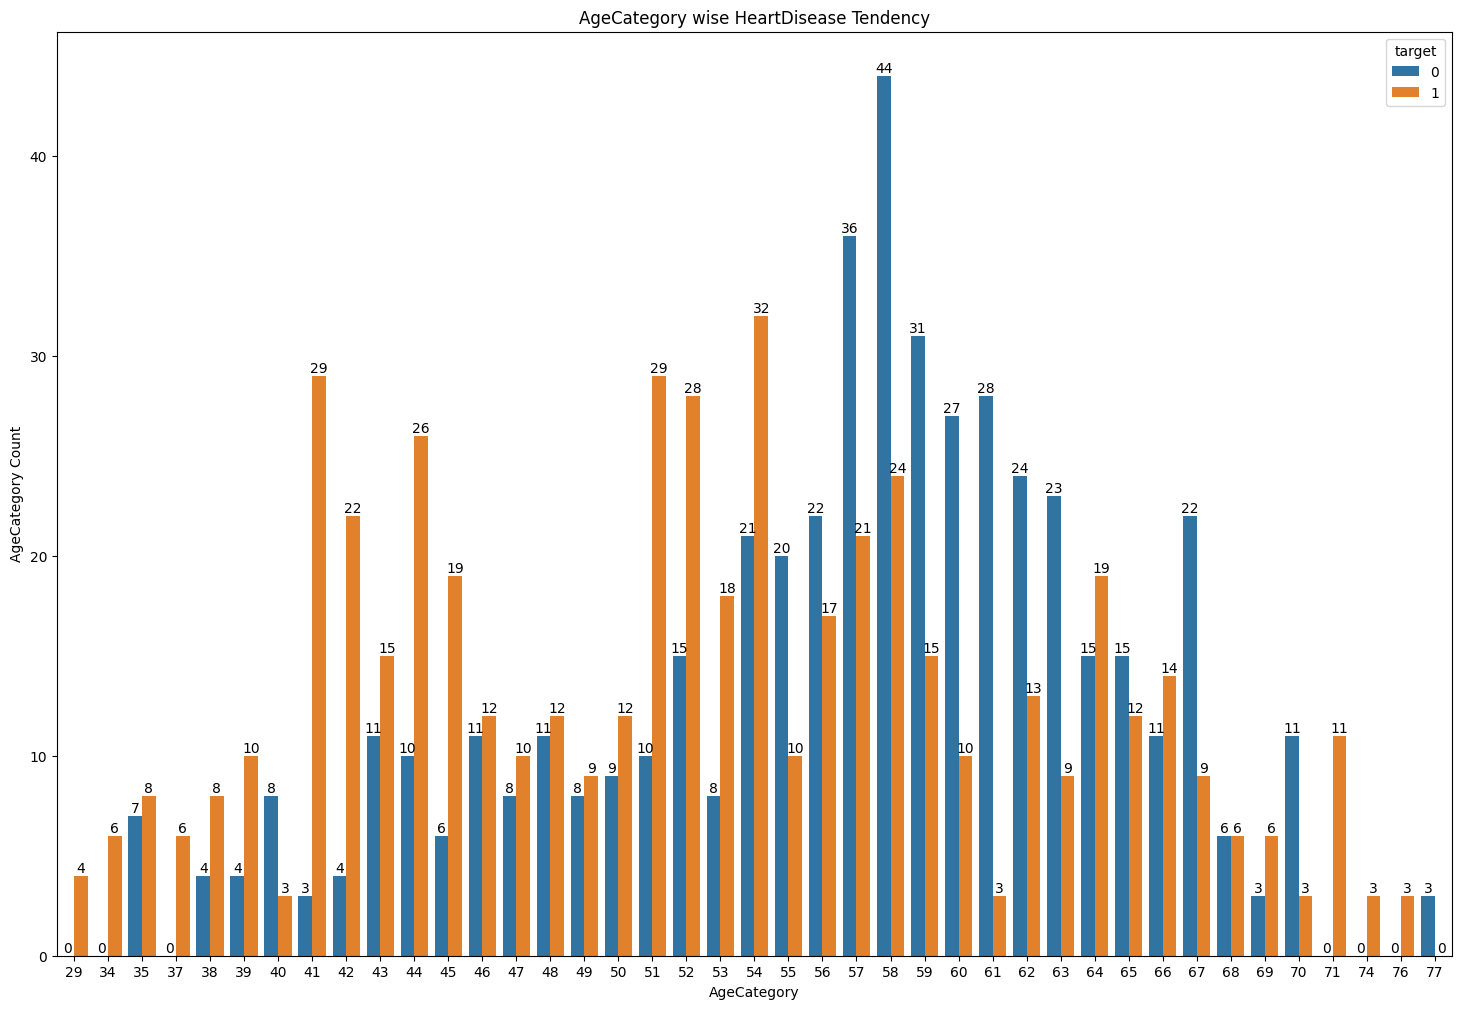

In [19]:
plt.figure(figsize=(18,12))
ax=sns.countplot(x='age', hue='target', data=df)
ax.set_xlabel( "AgeCategory")
ax.set_ylabel( "AgeCategory Count")
ax.set_title(  "AgeCategory wise HeartDisease Tendency")
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

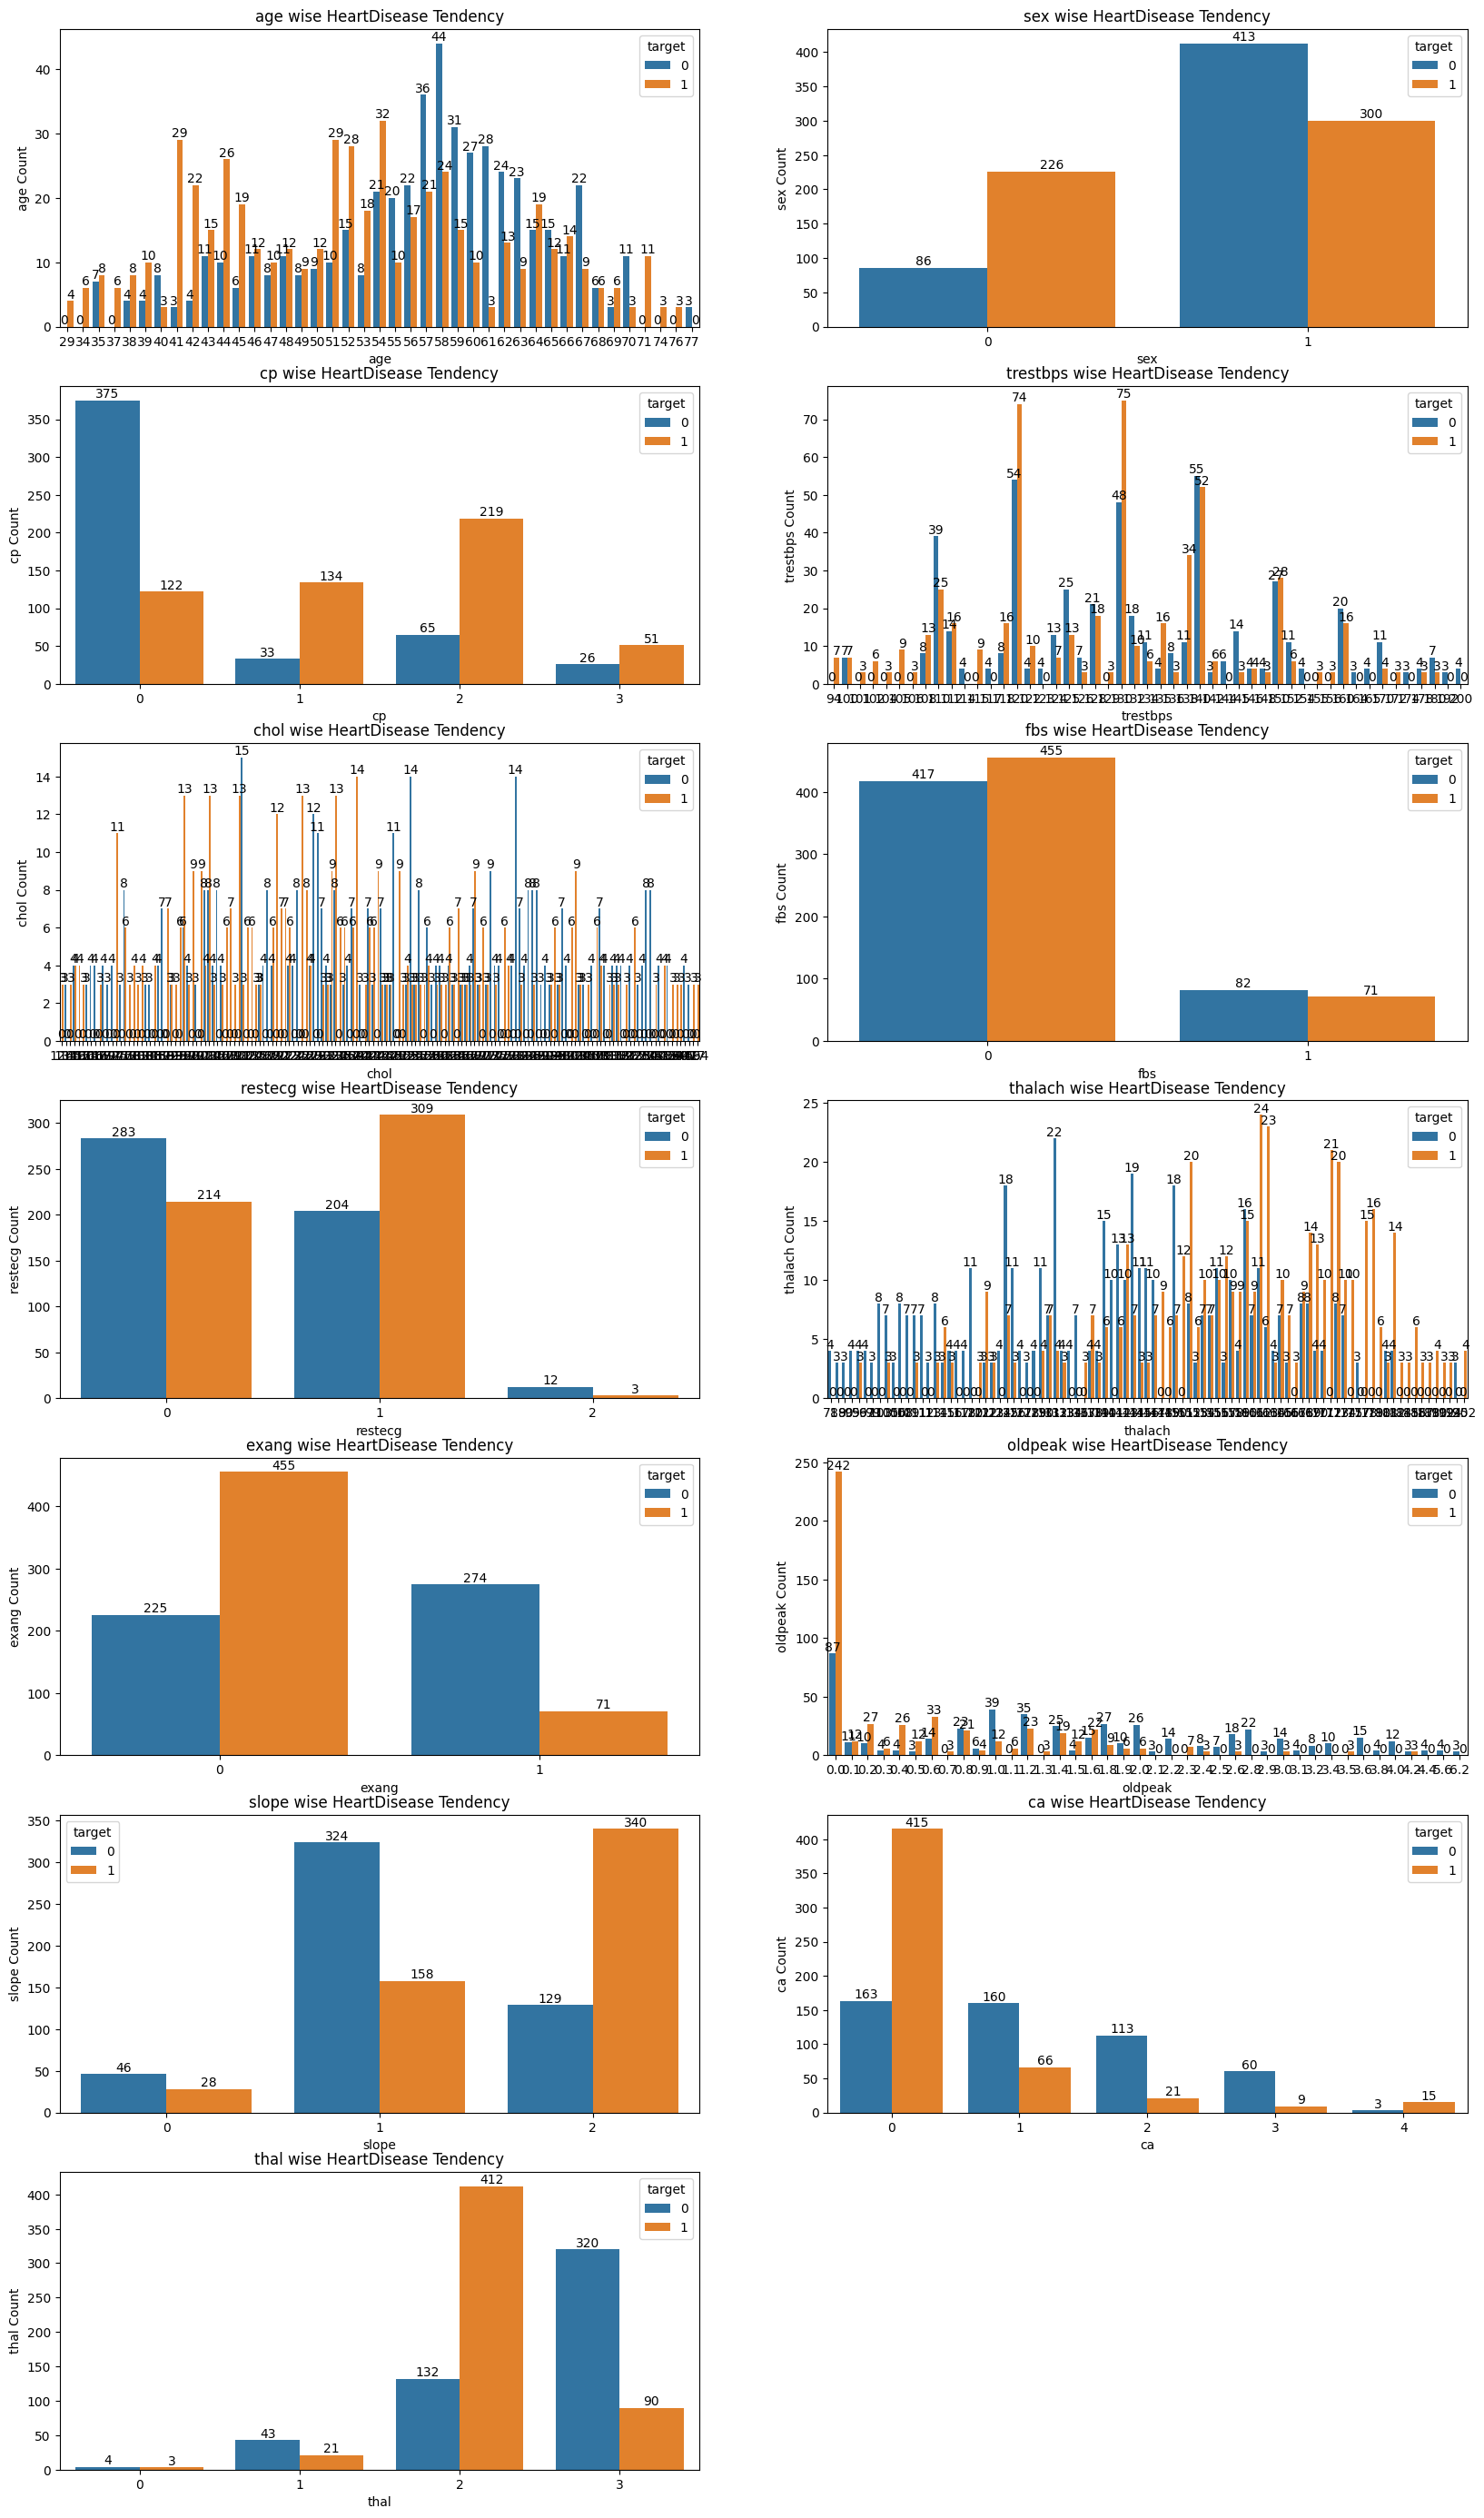

In [22]:
plt.figure(figsize=(20,40))
for i in range(1,14):

    plt.subplot(8,2,i)
    ax=sns.countplot(x=features[i-1],hue='target',data=df)
    #ax.set_xlabel(i)
    ax.set_ylabel( '{} Count'.format(features[i-1]))
    ax.set_title( '{} wise HeartDisease Tendency'.format(features[i-1]))
    for i in ax.containers:
        ax.bar_label(i)
plt.show()

##### High Probability of Heart Disease:

In [23]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


<Axes: >

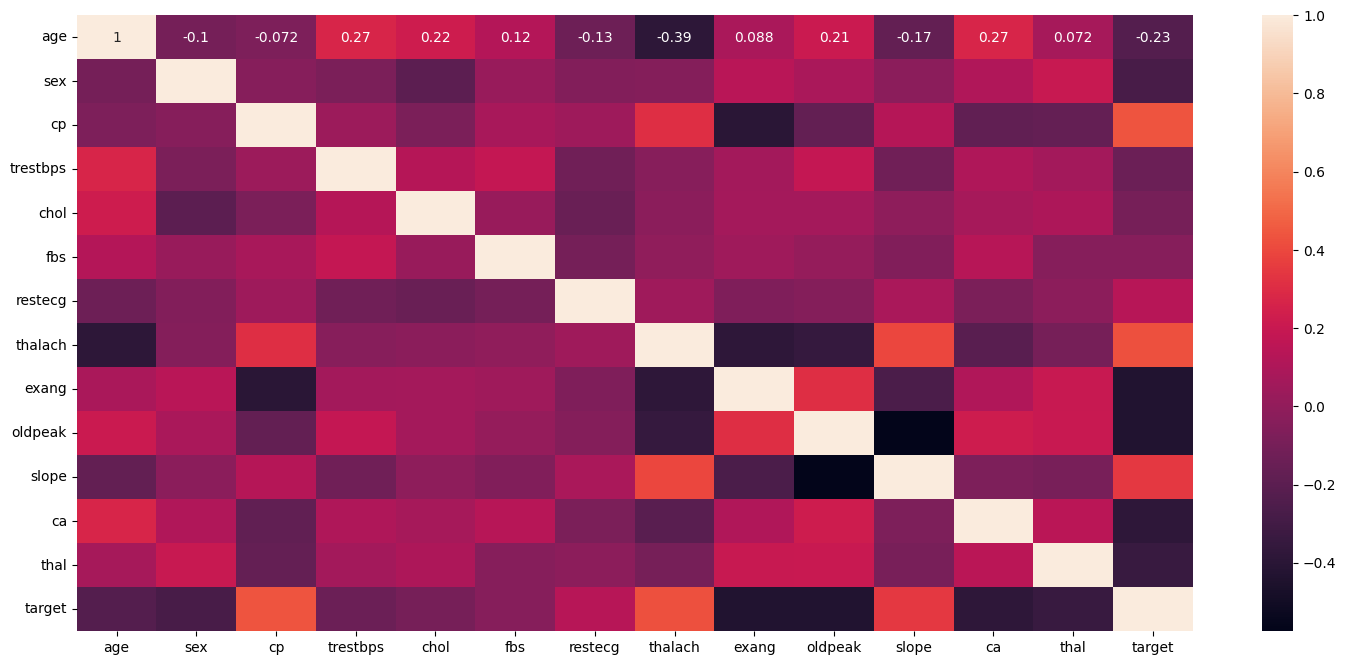

In [24]:
plt.figure(figsize=(18,8))
sns.heatmap(data=df.corr(),annot=True)

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 7. Separate X, Y values And Split Dataset for Training and Testing

 #### 7.1 Separate X, Y values 

In [26]:
X=df.drop('target',axis=1)

In [27]:
Y=df['target']

In [28]:
X.shape

(1025, 13)

#### 7.2. Split Dataset for Training and Testing 

#### Try to find best random state

In [29]:
from sklearn.model_selection import train_test_split as tts

In [30]:
max_state = 0
max_score_dif =0.9
accuracy_diff = []
for i in range(50):
    Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=0.30,random_state=i)
    logR=LogisticRegression()
    logR.fit(Xtrain,Ytrain)
    logR_predict=logR.predict(Xtest)

    Tr_score=logR.score(Xtrain,Ytrain)
    Tst_score=logR.score(Xtest,Ytest)

    score_dif = Tr_score-Tst_score
    
    if (max_score_dif > score_dif) and (score_dif > 0):
        max_state = i
        max_score_dif = score_dif
        accuracy_diff.append(score_dif)

In [31]:
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=0.30,random_state=max_state)

## 8. Train and Test with Different Algorithm

#### Logistic Regression

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
logR=LogisticRegression()
logR.fit(Xtrain,Ytrain)
logR_predict=logR.predict(Xtest)

Tr_score=logR.score(Xtrain,Ytrain)
Tst_score=logR.score(Xtest,Ytest)
print("max_state: ",max_state)
print("max_score_dif:",max_score_dif)
print("Complete LogisticRegression Training Score ! ",Tr_score, "With Random State: ",max_state)
print("Complete LogisticRegression Test Score ! ",Tst_score, "With Random State: ",max_state, '\n')

print("con_matrix: ",'\n',confusion_matrix(Ytest,logR_predict),'\n')
print("Accuracy: ",'\n', accuracy_score(Ytest,logR_predict),"\n")

max_state:  29
max_score_dif: 0.001489793330797462
Complete LogisticRegression Training Score !  0.8423988842398884 With Random State:  29
Complete LogisticRegression Test Score !  0.8409090909090909 With Random State:  29 

con_matrix:  
 [[119  33]
 [ 16 140]] 

Accuracy:  
 0.8409090909090909 



#### SVM

In [33]:
svc=SVC(kernel='rbf')
svc.fit(Xtrain,Ytrain)
svc_predict=svc.predict(Xtest)
svc_train_score=svc.score(Xtrain,Ytrain)
svc_test_score=svc.score(Xtest,Ytest)
print("Complete SVC Training !",svc_train_score)
print("Complete SVC Test!",svc_test_score)

Complete SVC Training ! 0.7112970711297071
Complete SVC Test! 0.711038961038961


#### KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier(n_neighbors= 5,metric='jaccard')
knn.fit(Xtrain,Ytrain)
knn_predict=knn.predict(Xtest)
knn_train_score=knn.score(Xtrain,Ytrain)
knn_test_score=knn.score(Xtest,Ytest)
print("Complete KNNClassification Training !",knn_train_score)
print("Complete KNNClassification Test!",knn_test_score)

Complete KNNClassification Training ! 0.8479776847977685
Complete KNNClassification Test! 0.827922077922078


 #### XGBClassifier

In [35]:
xgb = XGBClassifier(max_depth=2, n_estimators=10)
xgb.fit(Xtrain,Ytrain)
xgb_predict=xgb.predict(Xtest)
xgb_train_score=xgb.score(Xtrain,Ytrain)
xgb_test_score=xgb.score(Xtest,Ytest)
print("Complete XGBClassifier Training !",xgb_train_score)
print("Complete XGBClassifier Test!",xgb_test_score)

Complete XGBClassifier Training ! 0.8856345885634589
Complete XGBClassifier Test! 0.8668831168831169


#### AdaBoostClassifier

In [36]:
ada=AdaBoostClassifier(n_estimators=20, learning_rate=0.8)
ada.fit(Xtrain,Ytrain)
ada_predict=ada.predict(Xtest)
ada_train_score=ada.score(Xtrain,Ytrain)
ada_test_score=ada.score(Xtest,Ytest)
print("Complete AdaBoost Training !",ada_train_score)
print("Complete AdaBoost Test!",ada_test_score)

Complete AdaBoost Training ! 0.8842398884239888
Complete AdaBoost Test! 0.8733766233766234


#### GradientBoostingClassifier

In [37]:
gBoost=GradientBoostingClassifier(max_depth=2,ccp_alpha=0.01)
gBoost.fit(Xtrain,Ytrain)
gBoost_predict=gBoost.predict(Xtest)
gBoost_train_score=gBoost.score(Xtrain,Ytrain)
gBoost_test_score=gBoost.score(Xtest,Ytest)
print("Complete GradientBoosting Classifier Training ! ",gBoost_train_score)
print("Complete GradientBoosting Classifier Test!",gBoost_test_score)

Complete GradientBoosting Classifier Training !  0.8549511854951185
Complete GradientBoosting Classifier Test! 0.8474025974025974


#### DecisionTreeClassifier

In [38]:
dtclf=DecisionTreeClassifier(max_depth=2,ccp_alpha=0.1)
dtclf.fit(Xtrain,Ytrain)
dtclf_predict=dtclf.predict(Xtest)
dtclf_train_score=dtclf.score(Xtrain,Ytrain)
dtclf_test_score=dtclf.score(Xtest,Ytest)
print("Complete Decision Tree Classifier Training ! ",dtclf_train_score)
print("Complete Decision Tree Classifier Test!",dtclf_test_score)

Complete Decision Tree Classifier Training !  0.7684797768479776
Complete Decision Tree Classifier Test! 0.7402597402597403


#### RandomForestClassifier

In [39]:
rfclf = RandomForestClassifier(max_depth=2, random_state=max_state)
rfclf.fit(Xtrain,Ytrain)
rfclf_predict=rfclf.predict(Xtest)
rfclf_train_score=rfclf.score(Xtrain,Ytrain)
rfclf_test_score=rfclf.score(Xtest,Ytest)
print("Complete Random Forest Classifier Training ! ",rfclf_train_score)
print("Complete Random Forest Classifier Test!",rfclf_test_score)

Complete Random Forest Classifier Training !  0.8605299860529986
Complete Random Forest Classifier Test! 0.8409090909090909


 ## 9. Create Function for Accuracy

In [40]:
def model(Xtrain,Xtest,Ytrain,Ytest):
    model_name=['SVM Classifier(SVC)','XGBClassifier',
                'AdaBoostClassifier','GradientBoostingClassifier',
                'DecisionTreeClassifier','RandomForest Classifier','KNNClassification','LogisticRegression']
    accuracy=[]
    
    #SVM Classifier(SVC)
    svc.fit(Xtrain,Ytrain)
    svc_predict=svc.predict(Xtest)
    accuracy.append(svc.score(Xtest,Ytest)) 
    print("Complete SVM Classifier(SVC) !")    
                            
    #XGBClassifier
    xgb.fit(Xtrain,Ytrain)
    xgb_predict=xgb.predict(Xtest)
    accuracy.append(xgb.score(Xtest,Ytest))
    print("Complete XGBClassifier !")
                            
    #AdaBoostClassification
    ada.fit(Xtrain,Ytrain)
    ada_predict=ada.predict(Xtest)
    accuracy.append(ada.score(Xtest,Ytest))
    print("Complete AdaBoostClassification !")
                            
    #GradientBoostingClassifier
    gBoost.fit(Xtrain,Ytrain)
    gBoost_predict=gBoost.predict(Xtest)
    accuracy.append(gBoost.score(Xtest,Ytest))
    print("Complete GradientBoostingClassifier !") 
                            
    #DecisionTreeClassifier
    dtclf.fit(Xtrain,Ytrain)
    dtclf_predict=dtclf.predict(Xtest)
    accuracy.append(dtclf.score(Xtest,Ytest))
    print("Complete DecisionTreeClassifier !") 
                              
    #RandomForestClassifier
    rfclf.fit(Xtrain,Ytrain)
    rfclf_predict=rfclf.predict(Xtest)
    accuracy.append(rfclf.score(Xtest,Ytest))
    print("Complete RandomForestClassifier !") 
    
    #KNNClassification
    knn.fit(Xtrain,Ytrain)
    knn_predict=knn.predict(Xtest)
    accuracy.append(knn.score(Xtest,Ytest))
    print("Complete KNNClassification !")
    
    #LogisticRegression
    logR.fit(Xtrain,Ytrain)
    logR_predict=logR.predict(Xtest)
    accuracy.append(logR.score(Xtest,Ytest))
    print("Complete LogisticRegression !")
    
    return model_name,accuracy

In [41]:
model_name,accuracy=model(Xtrain,Xtest,Ytrain,Ytest)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


In [42]:
model_name,accuracy

(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.711038961038961,
  0.8668831168831169,
  0.8733766233766234,
  0.8474025974025974,
  0.7402597402597403,
  0.8409090909090909,
  0.827922077922078,
  0.8409090909090909])

#### 9.1. Create function for make Dataframe for all Accuracy 

In [43]:
def dataframe(y):
    vis={'Algorithm Name':[i for i in model_name],
     'Accuracy':y
     
    } 
    accuracy=pd.DataFrame(vis)
    return accuracy

In [44]:
df_allgo_accuracy=dataframe(accuracy)

In [45]:
df_allgo_accuracy

,Algorithm Name,Accuracy
0,SVM Classifier(SVC),0.711039
1,XGBClassifier,0.866883
2,AdaBoostClassifier,0.873377
3,GradientBoostingClassifier,0.847403
4,DecisionTreeClassifier,0.740260
5,RandomForest Classifier,0.840909
6,KNNClassification,0.827922
7,LogisticRegression,0.840909


#### 9.2 Plot Accuracy 

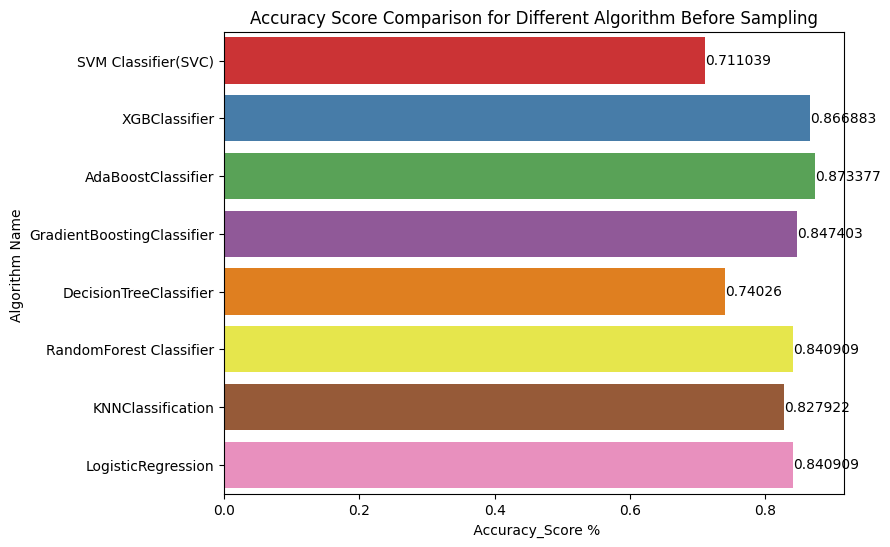

In [46]:
plt.figure(figsize = (8, 6))
ax=sns.barplot(y='Algorithm Name',x='Accuracy',data=df_allgo_accuracy, palette='Set1')
#sns.set(rc = {'figure.figsize':(20, 20)})
ax.bar_label(ax.containers[0])
ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Algorithm Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm Before Sampling")


plt.show()

 #### 9.3 Accuracy Analysis 

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       152
           1       0.81      0.90      0.85       156

    accuracy                           0.84       308
   macro avg       0.85      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308

Confusion Matrix: 
 [[119  33]
 [ 16 140]] 

Accuracy Score:  0.8409090909090909
ROC AUC Score:  0.8401653171390013


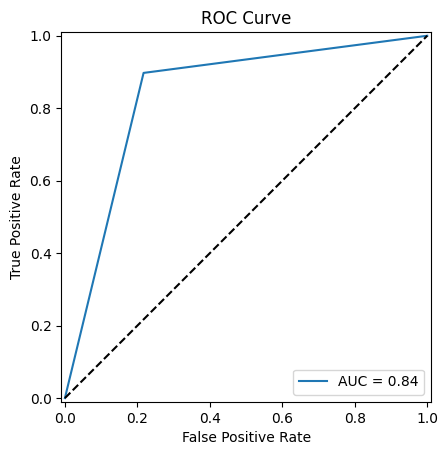

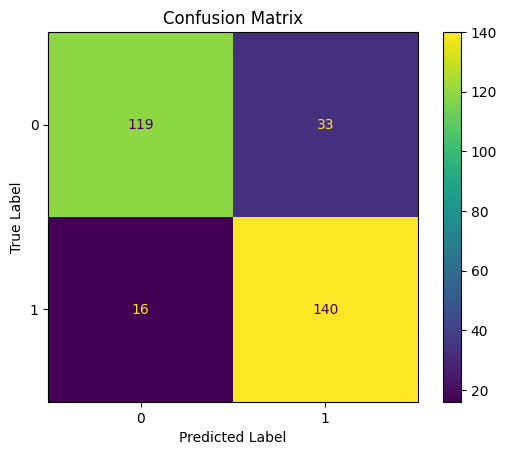

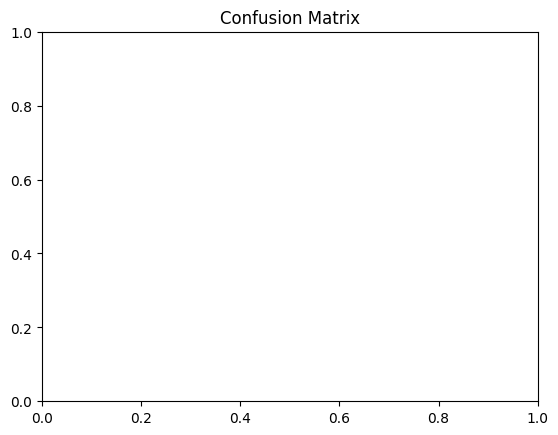

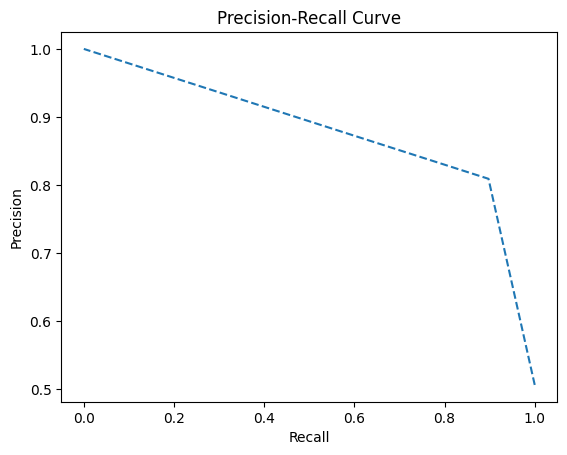

In [47]:
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, roc_auc_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Ytest, logR_predict)

print(classification_report(Ytest, logR_predict))
con_matrix = confusion_matrix(Ytest, logR_predict)
print("Confusion Matrix: \n", con_matrix, "\n")
logR_accuracy = accuracy_score(Ytest, logR_predict)
print("Accuracy Score: ", logR_accuracy)
logR_auc = roc_auc_score(Ytest, logR_predict)
print("ROC AUC Score: ", logR_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Ytest, logR_predict)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curve")
plt.show()

# Plot Confusion Matrix
plot_confusion_matrix(logR, Xtest, Ytest)
plt.title("Confusion Matrix")
plt.show()

# Plot Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(Ytest, logR_predict)
plt.plot(recall, precision, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


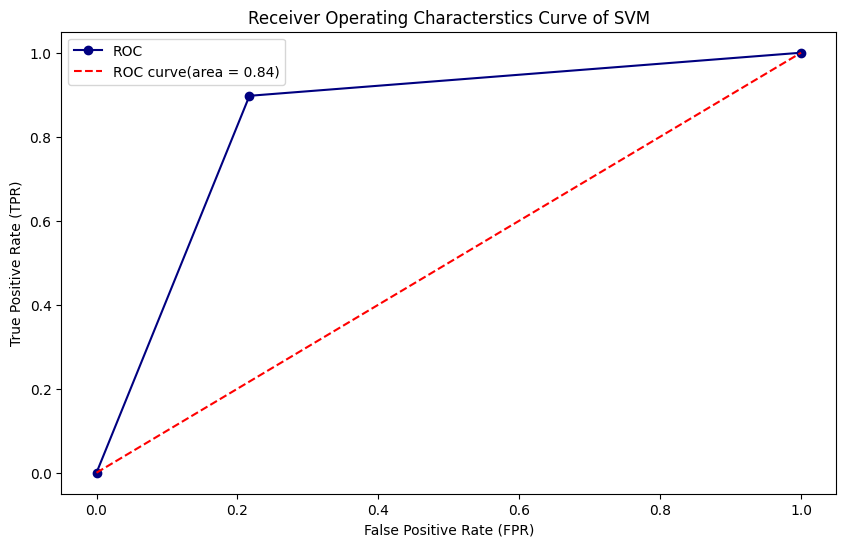

In [48]:
fpr, tpr, thresholds = roc_curve(Ytest,logR_predict)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% logR_auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics Curve of SVM')
plt.legend()
plt.show()

## 10. Check Outlier

<Axes: >

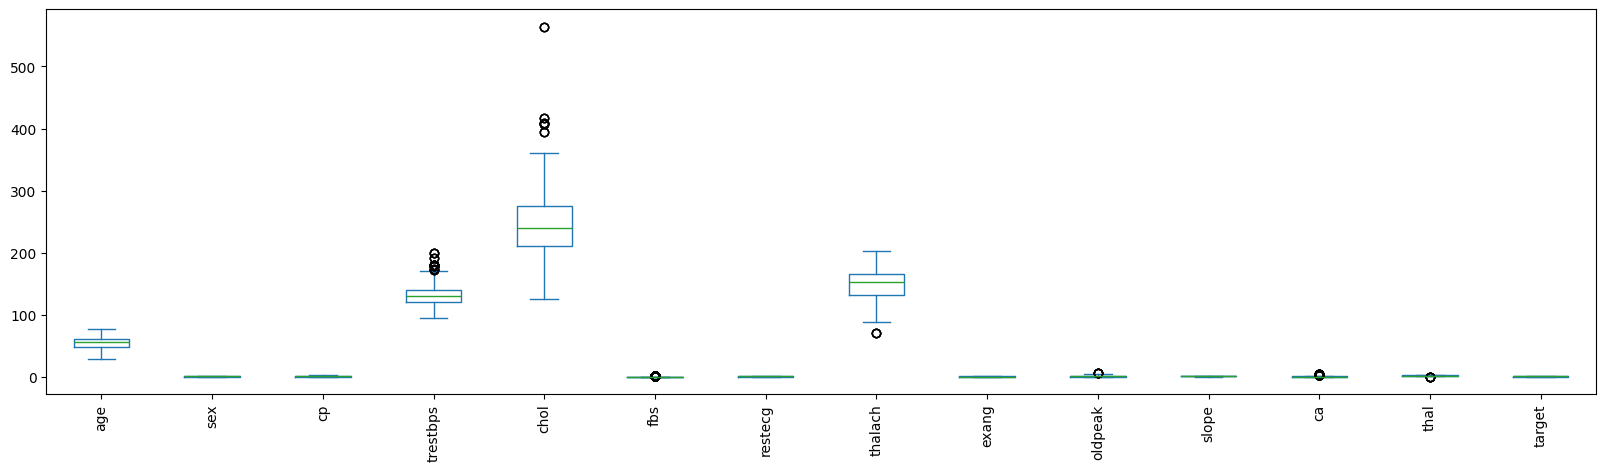

In [49]:
df.plot.box(figsize=(20,5), rot=90)

 ## 11. Feature Engineering 

#### 11.1 Feature Selection using "SelectKBest"

In [50]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.30,random_state=max_state)

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(X_train,Y_train)

SelectKBest()

#### Check nbest 6 features

In [52]:
col_score=pd.DataFrame(fit_feature.scores_,columns=['ScoreValue'])
col_name=pd.DataFrame(X.columns, columns=['FeatureName'])
top_feature=pd.concat([col_name,col_score],axis=1)
top_feature.nlargest(6,'ScoreValue')

,FeatureName,ScoreValue
2,cp,180.706670
8,exang,166.586963
9,oldpeak,163.757689
7,thalach,150.309678
12,thal,101.322160
11,ca,95.956444


#### 11.2 ExtraTreesClassifier 

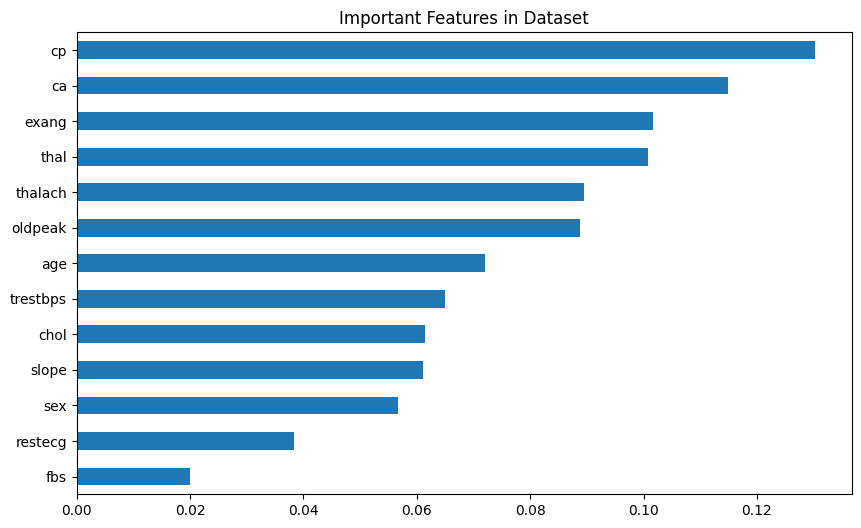

In [53]:
from sklearn.ensemble import ExtraTreesClassifier 
model_ETC = ExtraTreesClassifier()
model_ETC.fit(X_train,Y_train)
feat_importances = pd.Series(model_ETC.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.nsmallest(30).plot(kind='barh')
round(feat_importances,4)*100
plt.title('Important Features in Dataset',size=12)
plt.show()

#### Check best 6 features

In [54]:
important_feat=feat_importances.sort_values(ascending=False)[:6]
important_feat

cp         0.130200
ca         0.114833
exang      0.101594
thal       0.100851
thalach    0.089450
oldpeak    0.088746
dtype: float64

In [55]:
type(feat_importances)

pandas.core.series.Series

 ##### So, We saw that in Both Feature Selection techniques most important feature are following

In [56]:
important_feat_name=important_feat.index
important_feat_name

Index(['cp', 'ca', 'exang', 'thal', 'thalach', 'oldpeak'], dtype='object')

##### Lets try to find accuracy from selected 6 Features

In [57]:
for col in X.columns:
    if col not in important_feat_name:
        X_train.drop(col,axis=1,inplace=True)
        
for col in X.columns:
    if col not in important_feat_name:
        X_test.drop(col,axis=1,inplace=True)

In [58]:
model_name,after_fs_WO_SC_accuracy=model(X_train,X_test,Y_train,Y_test)
model_name,after_fs_WO_SC_accuracy

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.7175324675324676,
  0.8603896103896104,
  0.8603896103896104,
  0.8409090909090909,
  0.7402597402597403,
  0.8409090909090909,
  0.8084415584415584,
  0.8441558441558441])

In [59]:
df_allgo_accuracy['after_fs_WO_SC_accuracy']=after_fs_WO_SC_accuracy
df_allgo_accuracy

,Algorithm Name,Accuracy,after_fs_WO_SC_accuracy
0,SVM Classifier(SVC),0.711039,0.717532
1,XGBClassifier,0.866883,0.860390
2,AdaBoostClassifier,0.873377,0.860390
3,GradientBoostingClassifier,0.847403,0.840909
4,DecisionTreeClassifier,0.740260,0.740260
5,RandomForest Classifier,0.840909,0.840909
6,KNNClassification,0.827922,0.808442
7,LogisticRegression,0.840909,0.844156


##### Again Train and Test the model for selected feature

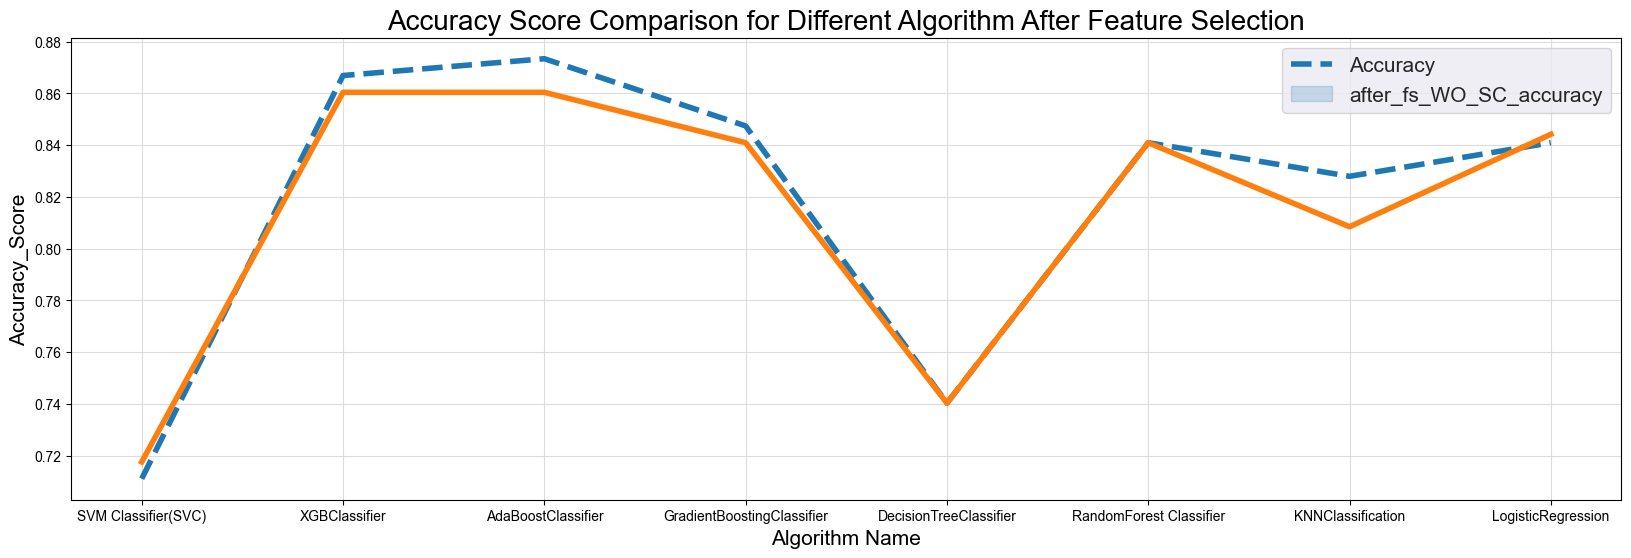

In [60]:
plt.figure(figsize=(20,6))
ax= sns.lineplot(x='Algorithm Name',y='Accuracy', data = df_allgo_accuracy,linewidth=4,linestyle='--')
ax= sns.lineplot(x='Algorithm Name',y='after_fs_WO_SC_accuracy', data = df_allgo_accuracy,linewidth=4)
ax.set_xlabel("Algorithm Name",fontsize=15)
ax.set_ylabel("Accuracy_Score",fontsize=15)
ax.grid(color = 'gainsboro')
sns.set_style("darkgrid")
# ax.legend(loc='best',fontsize= 15)
ax.legend(['Accuracy','after_fs_WO_SC_accuracy'],loc='best',fontsize= 15)
ax.tick_params(labelsize=10)
ax.set_title( "Accuracy Score Comparison for Different Algorithm After Feature Selection",fontsize= 20)
plt.show()

## 12.Scalling

##### 12.1 MinMaxScaler

In [61]:
mmxscaler = MinMaxScaler()

In [62]:
import warnings
warnings.filterwarnings('ignore')
colls=[X.columns]
for col in colls:
        X[col]=mmxscaler.fit_transform(X[col])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


<Axes: >

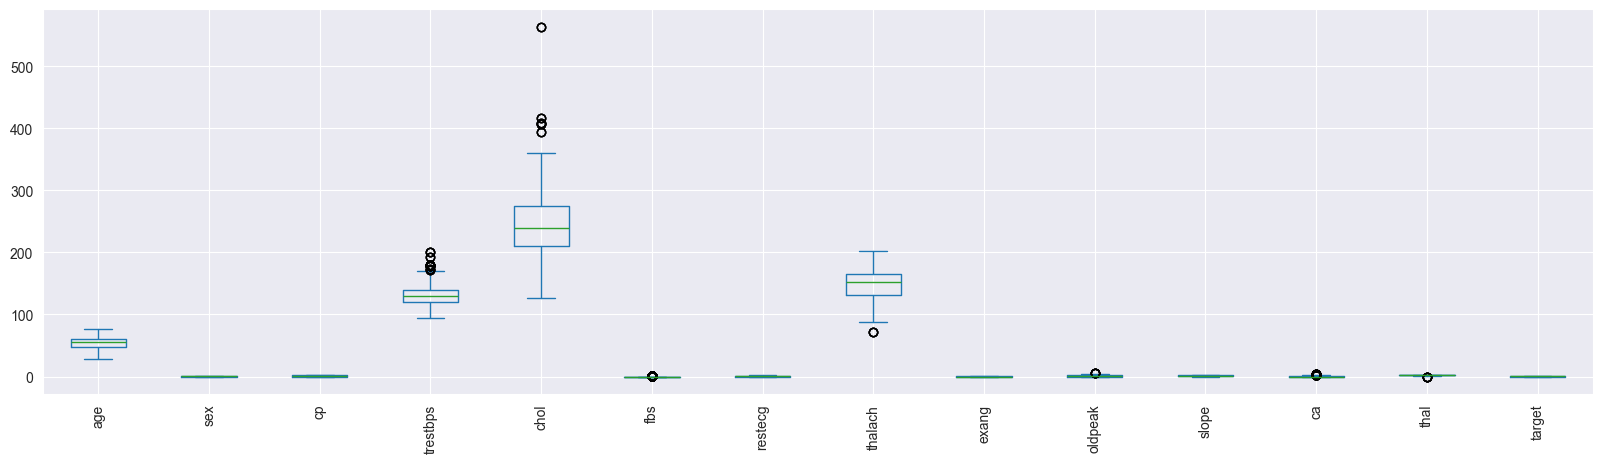

In [63]:
df.plot.box(figsize=(20,5), rot=90)

###### 12.1.1 Again Train and Test for Scalling Data 

In [64]:
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.30,random_state=max_state)

In [65]:
model_name,after_scalling_accuracy=model(xtrain,xtest,ytrain,ytest)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


In [66]:
model_name,after_scalling_accuracy

(['SVM Classifier(SVC)',
  'XGBClassifier',
  'AdaBoostClassifier',
  'GradientBoostingClassifier',
  'DecisionTreeClassifier',
  'RandomForest Classifier',
  'KNNClassification',
  'LogisticRegression'],
 [0.8831168831168831,
  0.8668831168831169,
  0.8733766233766234,
  0.8474025974025974,
  0.7402597402597403,
  0.8409090909090909,
  0.8344155844155844,
  0.8506493506493507])

##### Add New Accuracy into Accuracy Dataframe

In [67]:
df_allgo_accuracy['after_scalling_accuracy']=after_scalling_accuracy
df_allgo_accuracy

,Algorithm Name,Accuracy,after_fs_WO_SC_accuracy,after_scalling_accuracy
0,SVM Classifier(SVC),0.711039,0.717532,0.883117
1,XGBClassifier,0.866883,0.860390,0.866883
2,AdaBoostClassifier,0.873377,0.860390,0.873377
3,GradientBoostingClassifier,0.847403,0.840909,0.847403
4,DecisionTreeClassifier,0.740260,0.740260,0.740260
5,RandomForest Classifier,0.840909,0.840909,0.840909
6,KNNClassification,0.827922,0.808442,0.834416
7,LogisticRegression,0.840909,0.844156,0.850649


In [68]:
df_allgo_accuracy['Algorithm Name']

0           SVM Classifier(SVC)
1                 XGBClassifier
2            AdaBoostClassifier
3    GradientBoostingClassifier
4        DecisionTreeClassifier
5       RandomForest Classifier
6             KNNClassification
7            LogisticRegression
Name: Algorithm Name, dtype: object

##### Lets plot Accuracy Comparison graph again with new accuracy.

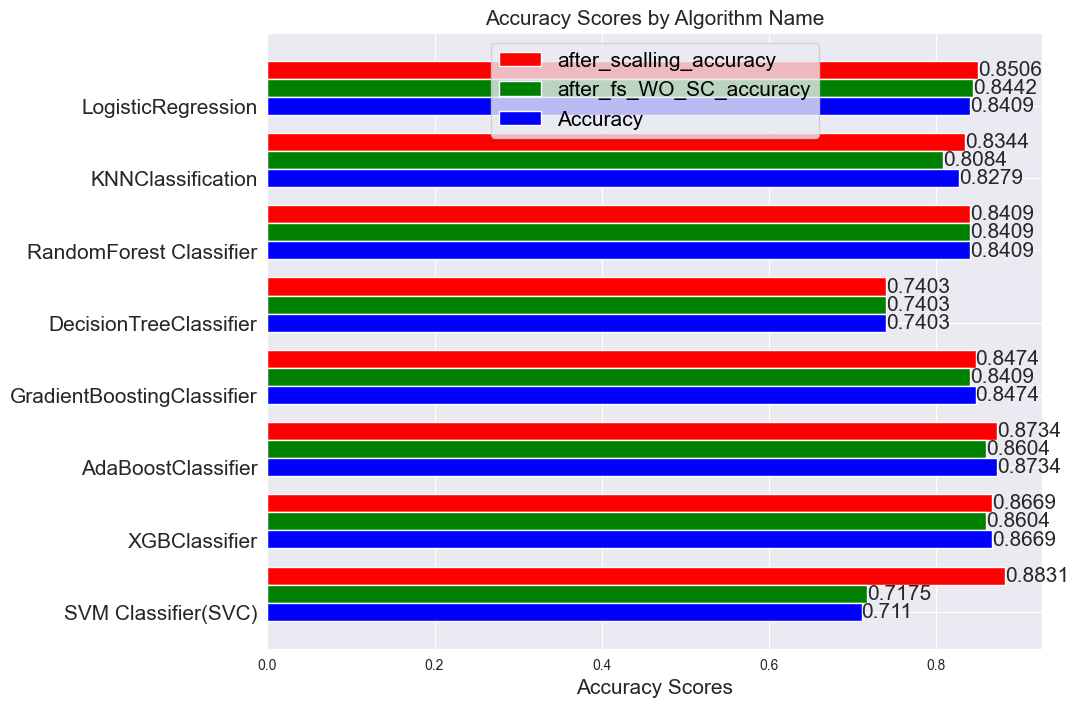

In [69]:
AlgorithmName = df_allgo_accuracy['Algorithm Name'].squeeze()
Accuracy = df_allgo_accuracy['Accuracy'].squeeze().round(4)
after_fs_WO_SC_accuracy = df_allgo_accuracy['after_fs_WO_SC_accuracy'].squeeze().round(4)
after_scalling_accuracy = df_allgo_accuracy['after_scalling_accuracy'].squeeze().round(4)

x = np.arange(len(AlgorithmName))  # the label locations
height = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))

plot3 = ax.barh(x + height+height, after_scalling_accuracy, height, label='after_scalling_accuracy',color='r')
plot2 = ax.barh(x + height, after_fs_WO_SC_accuracy, height, label='after_fs_WO_SC_accuracy',color='g')
plot1 = ax.barh(x , Accuracy, height, label='Accuracy',color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Accuracy Scores',fontsize= 15)
ax.set_title('Accuracy Scores by Algorithm Name',fontsize= 15)
ax.set_yticks(x)
ax.set_yticklabels(AlgorithmName,fontsize= 15)
ax.legend(loc= 'upper center',labelcolor='black',fontsize= 15)

ax.bar_label(ax.containers[0],fontsize= 15)
ax.bar_label(ax.containers[1],fontsize= 15)
ax.bar_label(ax.containers[2],fontsize= 15)
# fig.tight_layout()

plt.show()

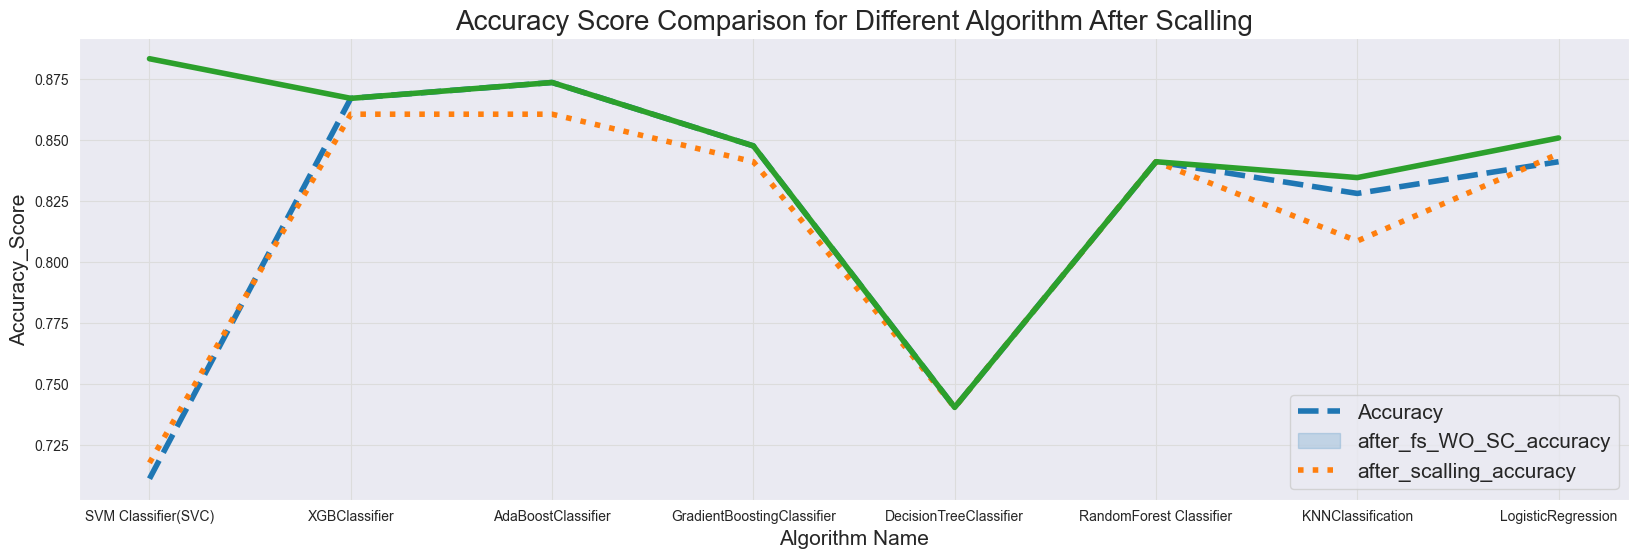

In [70]:
plt.figure(figsize=(20,6))
ax= sns.lineplot(x='Algorithm Name',y='Accuracy', data = df_allgo_accuracy,linewidth=4,linestyle='--')
ax= sns.lineplot(x='Algorithm Name',y='after_fs_WO_SC_accuracy', data = df_allgo_accuracy,linewidth=4,linestyle=':')
ax= sns.lineplot(x='Algorithm Name',y='after_scalling_accuracy', data = df_allgo_accuracy,linewidth=4)
ax.set_xlabel("Algorithm Name",fontsize=15)
ax.set_ylabel("Accuracy_Score",fontsize=15)
ax.grid(color = 'gainsboro')
sns.set_style("darkgrid")
# ax.legend(loc='best',fontsize= 15)
ax.legend(['Accuracy','after_fs_WO_SC_accuracy','after_scalling_accuracy'],loc='best',fontsize= 15)
ax.tick_params(labelsize=10)
ax.set_title( "Accuracy Score Comparison for Different Algorithm After Scalling",fontsize= 20)
plt.show()

In [71]:
svc.fit(xtrain,ytrain)
svc_predict=svc.predict(xtest)
print("Complete SVM Classifier(SVC) !")  

Complete SVM Classifier(SVC) !


##### Plot Accuracy Score Graph

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       152
           1       0.90      0.87      0.88       156

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

Confusion Matrix: 
 [[137  15]
 [ 21 135]] 

Accuracy Score:  0.8831168831168831
ROC AUC Score:  0.8833502024291499


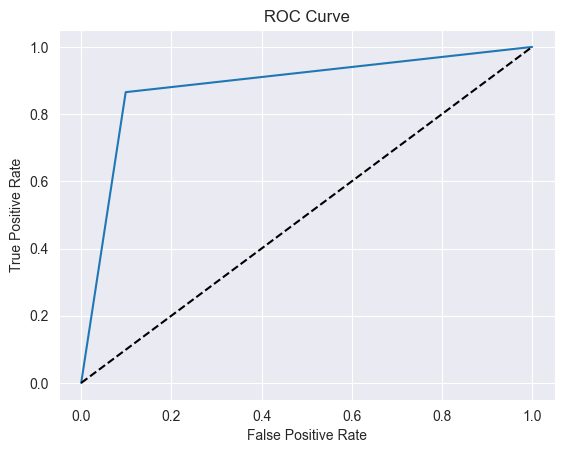

------------------------------------------------------------ 



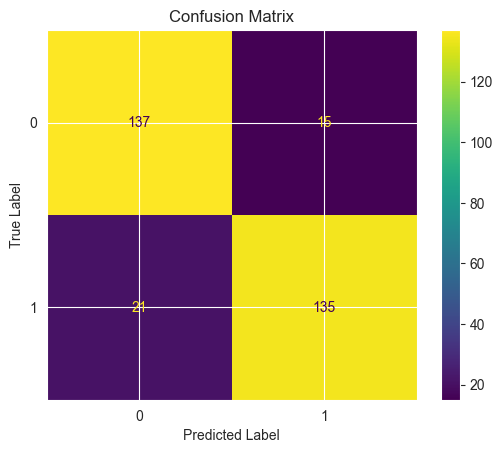

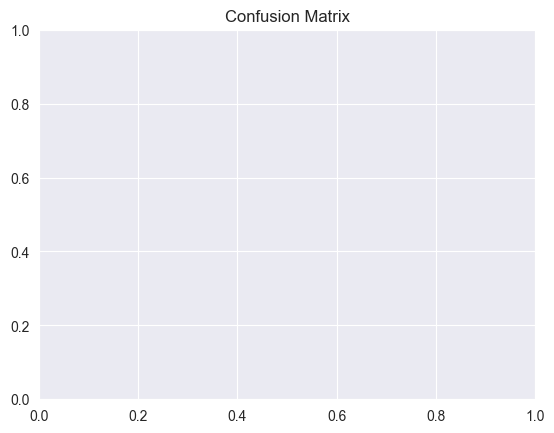

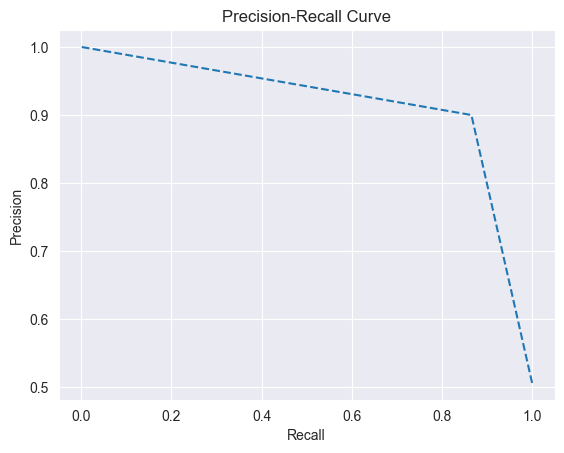

In [72]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have defined xtrain, ytrain, xtest, ytest, svc, svc_predict earlier

print(classification_report(ytest, svc_predict))
con_matrix = confusion_matrix(ytest, svc_predict)
print("Confusion Matrix: \n", con_matrix, "\n")
svc_accuracy = accuracy_score(ytest, svc_predict)
print("Accuracy Score: ", svc_accuracy)
svc_auc = roc_auc_score(ytest, svc_predict)
print("ROC AUC Score: ", svc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ytest, svc_predict)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

a = "------"
print(a * 10, "\n")

plot_confusion_matrix(svc, xtest, ytest)
plt.title("Confusion Matrix")
plt.show()

precision, recall, thresholds = precision_recall_curve(ytest, svc_predict)
plt.plot(recall, precision, linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

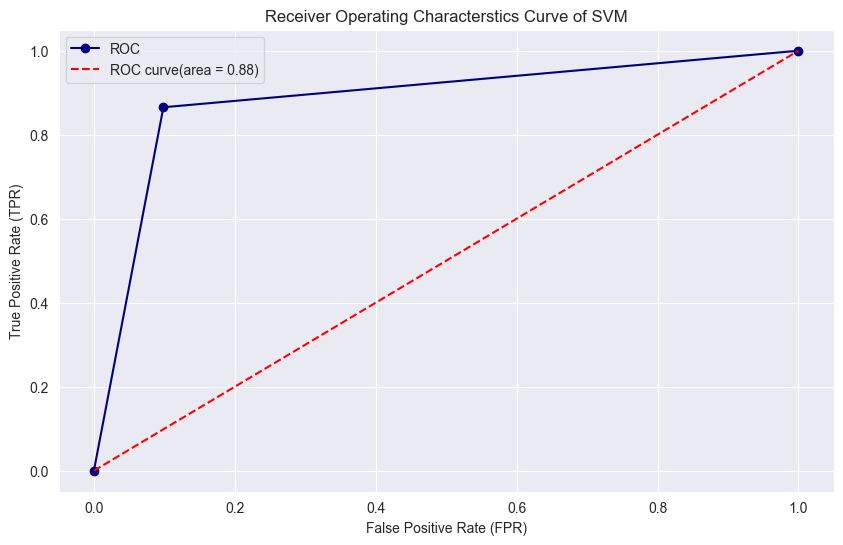

In [73]:
fpr, tpr, thresholds = roc_curve(ytest,svc_predict)
plt.figure(figsize=(10,6))
plt.plot(fpr , tpr , color='navy',label='ROC',marker='o')
plt.plot([0,1],[0,1],color = 'red',linestyle='--',label='ROC curve(area = %0.2f)'% svc_auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characterstics Curve of SVM')
plt.legend()
plt.show()

In [74]:
print(fpr)

[0.         0.09868421 1.        ]


##### Again Feature Selection using "SelectKBest"

In [75]:
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.30,random_state=max_state)

In [76]:
#Feature Engineering
#Feature Selection using "SelectKBest"

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(x_train,y_train) 

col_score=pd.DataFrame(fit_feature.scores_,columns=['ScoreValue'])
col_name=pd.DataFrame(X.columns, columns=['FeatureName'])
top_feature=pd.concat([col_name,col_score],axis=1)
top_feature.nlargest(6,'ScoreValue')

,FeatureName,ScoreValue
2,cp,180.706670
8,exang,166.586963
9,oldpeak,163.757689
7,thalach,150.309678
12,thal,101.322160
11,ca,95.956444


##### ExtraTreesClassifier

In [77]:
from sklearn.ensemble import ExtraTreesClassifier 

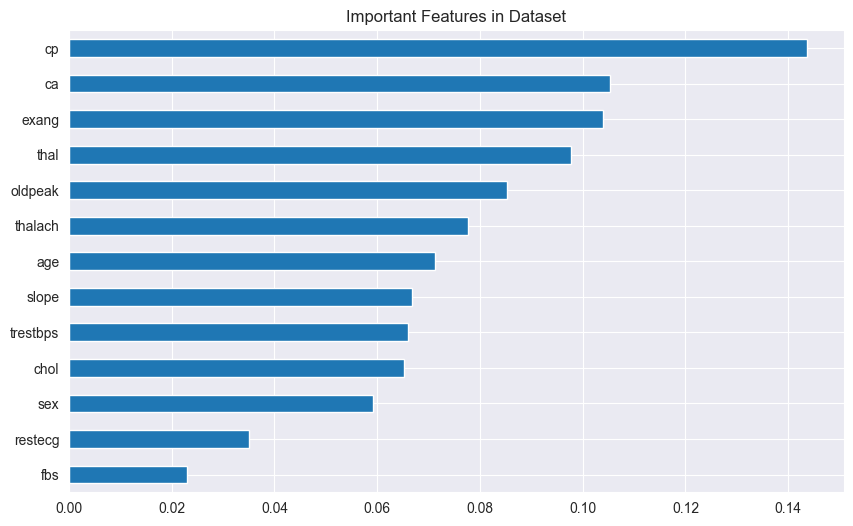

In [78]:
model_ETC = ExtraTreesClassifier()
model_ETC.fit(x_train,y_train)
feat_importances = pd.Series(model_ETC.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.nsmallest(30).plot(kind='barh')
round(feat_importances,4)*100
plt.title('Important Features in Dataset',size=12)
plt.show()

In [79]:
type(feat_importances)

pandas.core.series.Series

In [80]:
important_feat=feat_importances.sort_values(ascending=False)[:6]

In [81]:
important_feat

cp         0.143671
ca         0.105219
exang      0.103939
thal       0.097784
oldpeak    0.085254
thalach    0.077757
dtype: float64

#### So, We saw that in Both Feature Selection techniques most important feature are following

In [82]:
important_feat_name=important_feat.index
important_feat_name

Index(['cp', 'ca', 'exang', 'thal', 'oldpeak', 'thalach'], dtype='object')

##### Make update Train and Test Data for selected best Feature

In [83]:
for col in X.columns:
    if col not in important_feat_name:
        x_train.drop(col,axis=1,inplace=True)

In [84]:
x_train.head()

,cp,thalach,exang,oldpeak,ca,thal
1001,0.000000,0.816794,0.0,0.000000,0.00,0.666667
743,0.333333,0.557252,0.0,0.064516,1.00,1.000000
366,0.666667,0.717557,0.0,0.403226,0.25,1.000000
403,0.333333,0.770992,0.0,0.000000,0.00,0.666667
993,0.000000,0.549618,1.0,0.016129,1.00,1.000000


In [85]:
for col in X.columns:
    if col not in important_feat_name:
        x_test.drop(col,axis=1,inplace=True)
        
x_test.head()

,cp,thalach,exang,oldpeak,ca,thal
570,0.666667,0.755725,0.0,0.000000,0.00,0.666667
946,0.666667,0.770992,0.0,0.000000,0.25,0.666667
624,1.000000,0.564885,0.0,0.677419,0.00,1.000000
447,0.000000,0.564885,1.0,0.129032,0.25,1.000000
693,0.333333,0.824427,0.0,0.000000,0.50,0.666667


##### Again Train and Test the model for selected feature

In [86]:
model_name,after_scalling_w_fs_accuracy=model(x_train,x_test,y_train,y_test)

Complete SVM Classifier(SVC) !
Complete XGBClassifier !
Complete AdaBoostClassification !
Complete GradientBoostingClassifier !
Complete DecisionTreeClassifier !
Complete RandomForestClassifier !
Complete KNNClassification !
Complete LogisticRegression !


##### Add New Accuracy into Accuracy Dataframe

In [87]:
df_allgo_accuracy['after_scalling_w_fs_accuracy']=after_scalling_w_fs_accuracy
df_allgo_accuracy

,Algorithm Name,Accuracy,after_fs_WO_SC_accuracy,after_scalling_accuracy,after_scalling_w_fs_accuracy
0,SVM Classifier(SVC),0.711039,0.717532,0.883117,0.853896
1,XGBClassifier,0.866883,0.860390,0.866883,0.860390
2,AdaBoostClassifier,0.873377,0.860390,0.873377,0.860390
3,GradientBoostingClassifier,0.847403,0.840909,0.847403,0.840909
4,DecisionTreeClassifier,0.740260,0.740260,0.740260,0.740260
5,RandomForest Classifier,0.840909,0.840909,0.840909,0.840909
6,KNNClassification,0.827922,0.808442,0.834416,0.827922
7,LogisticRegression,0.840909,0.844156,0.850649,0.840909


##### Lets plot Accuracy Comparison graph again with new accuracy

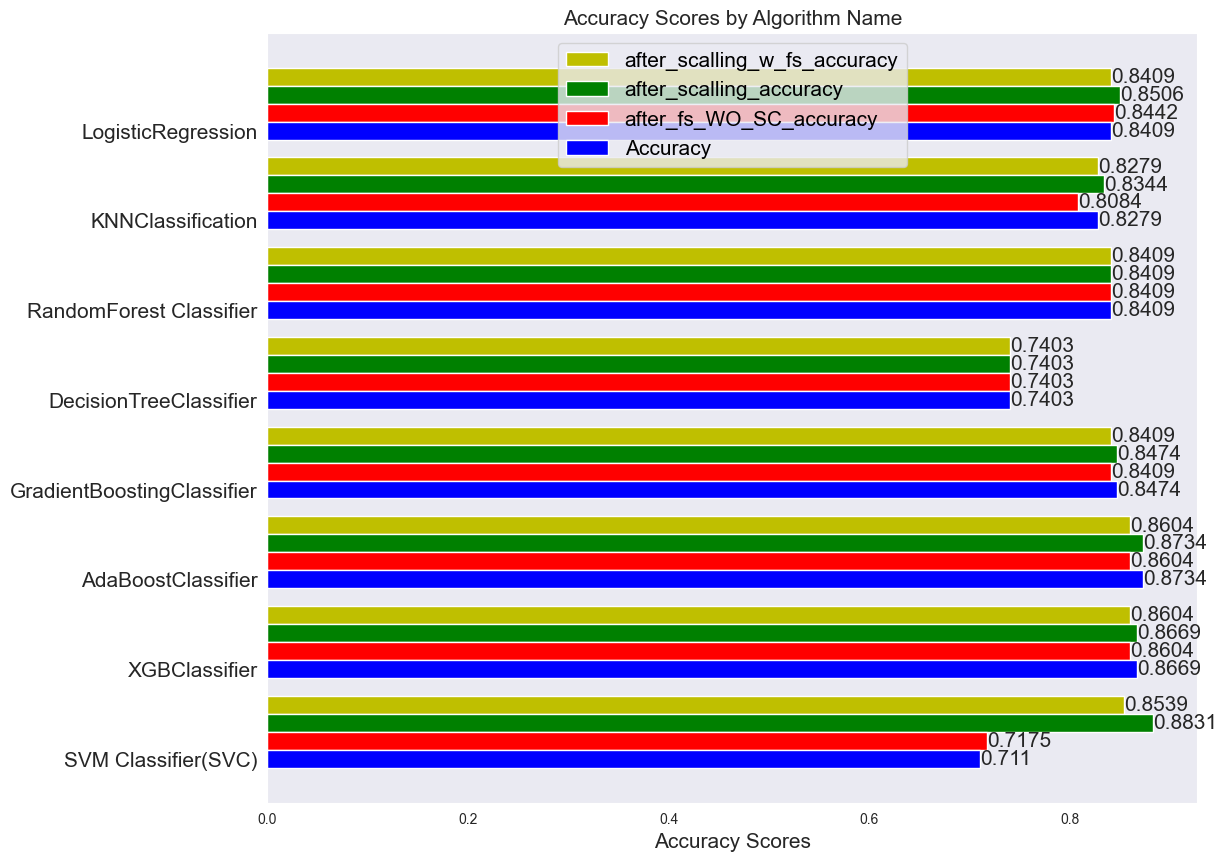

In [88]:
AlgorithmName = df_allgo_accuracy['Algorithm Name'].squeeze()
Accuracy = df_allgo_accuracy['Accuracy'].squeeze().round(4)
after_fs_WO_SC_accuracy = df_allgo_accuracy['after_fs_WO_SC_accuracy'].squeeze().round(4)
after_scalling_accuracy = df_allgo_accuracy['after_scalling_accuracy'].squeeze().round(4)
after_scalling_w_fs_accuracy = df_allgo_accuracy['after_scalling_w_fs_accuracy'].squeeze().round(4)

x = np.arange(len(AlgorithmName))  # the label locations
height = 0.20  # the height of the bars

fig, ax = plt.subplots(figsize=(12,10))

plot4 = ax.barh(x + height+height+height, after_scalling_w_fs_accuracy, height, label='after_scalling_w_fs_accuracy',color='y')
plot3 = ax.barh(x + height+height, after_scalling_accuracy, height, label='after_scalling_accuracy',color='g')
plot2 = ax.barh(x + height, after_fs_WO_SC_accuracy, height, label='after_fs_WO_SC_accuracy',color='r')
plot1 = ax.barh(x, Accuracy, height, label='Accuracy',color='b')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Accuracy Scores',fontsize= 15)
ax.set_title('Accuracy Scores by Algorithm Name',fontsize= 15)
ax.set_yticks(x)
ax.set_yticklabels(AlgorithmName,fontsize= 15)
ax.legend(loc= 'upper center',labelcolor='black',fontsize= 15)
ax.grid()

ax.bar_label(ax.containers[0],fontsize= 15)
ax.bar_label(ax.containers[1],fontsize= 15)
ax.bar_label(ax.containers[2],fontsize= 15)
ax.bar_label(ax.containers[3],fontsize= 15)
# fig.tight_layout()
plt.show()

In [89]:
line_name= df_allgo_accuracy.columns.tolist()[1:] 

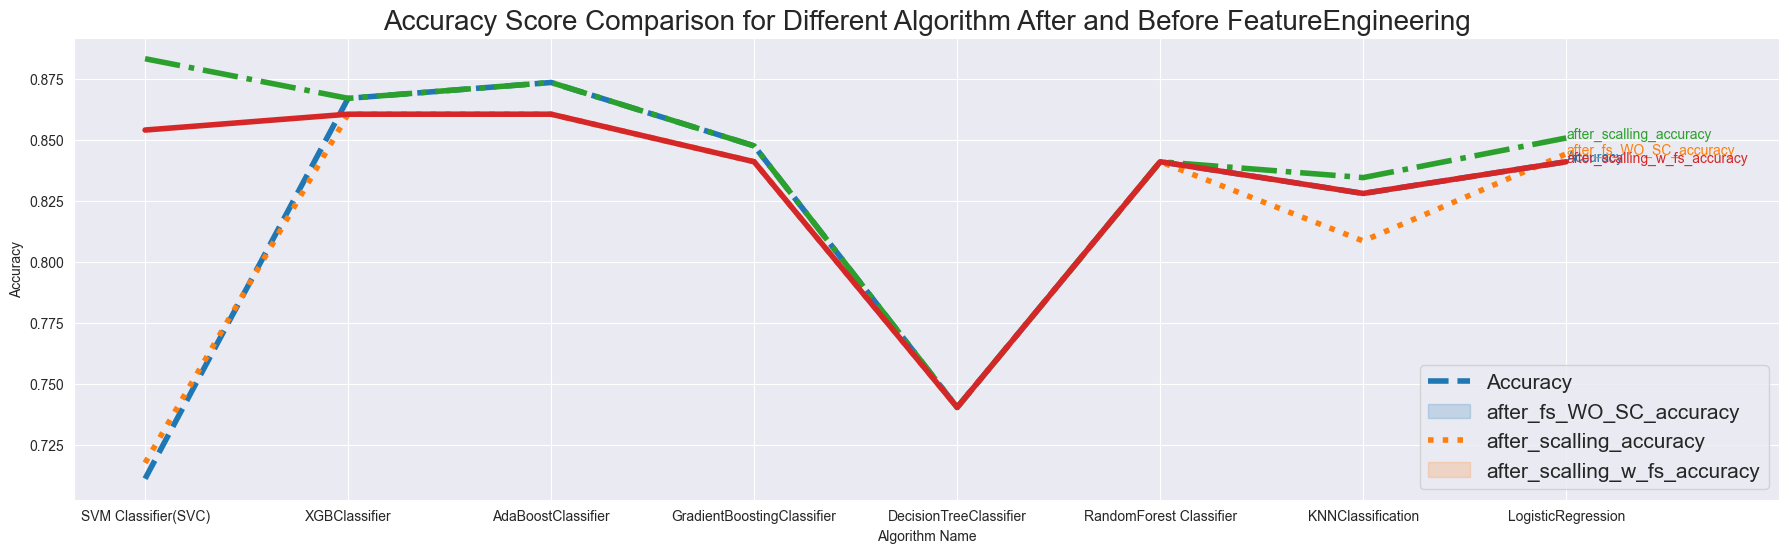

In [90]:
 #df1 = pd.melt(df_allgo_accuracy, 'Algorithm Name', var_name='Accuracy', 
#               value_name='Value')
line_name= df_allgo_accuracy.columns.tolist()
plt.figure(figsize=(22,6))
ax= sns.lineplot(x='Algorithm Name',y='Accuracy', data = df_allgo_accuracy,linewidth=4,linestyle='--',)
ax= sns.lineplot(x='Algorithm Name',y='after_fs_WO_SC_accuracy', data = df_allgo_accuracy,linewidth=4,linestyle=':')
ax= sns.lineplot(x='Algorithm Name',y='after_scalling_accuracy', data = df_allgo_accuracy,linewidth=4,linestyle='-.')
ax= sns.lineplot(x='Algorithm Name',y='after_scalling_w_fs_accuracy', data = df_allgo_accuracy,linewidth=4)

for line, Accuracy in zip(ax.lines, df_allgo_accuracy.columns.tolist()[1:]):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(Accuracy,xy=(x, y),xytext=(0, 0),color=line.get_color(),xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.2)
ax.legend(['Accuracy','after_fs_WO_SC_accuracy','after_scalling_accuracy','after_scalling_w_fs_accuracy'],loc='best',fontsize= 15)
# plt.tight_layout()
ax.tick_params(labelsize=10)
ax.set_title( "Accuracy Score Comparison for Different Algorithm After and Before FeatureEngineering",fontsize= 20)
plt.show()

## 12. Analysis Summary

#### We observed from above Accuracy Score Comparison that, AdaBoostClassifier algorithm has perform better accuracy after scalling, that is 87.34 %. But Before Scalling and Feature Selection AdaBoostClassifier perform same accuracy with 87.33%. So Finally we can use AdaBoostClassifier for our final model.

 ##### AdaBoostClassifier

In [91]:
from sklearn.ensemble import AdaBoostClassifier

final_model_ada = AdaBoostClassifier()  # AdaBoostClassifier instance
final_model_ada.fit(x_train, y_train)  # Train the model
ada_predict = final_model_ada.predict(x_test)  # Make predictions
print("Complete AdaBoost Classifier!")  # Output completion message


Complete AdaBoost Classifier!


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       152
           1       0.85      0.89      0.87       156

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308

Confusion Matrix: 
 [[127  25]
 [ 17 139]] 

Accuracy Score:  0.8636363636363636
ROC AUC Score:  0.8632759784075573


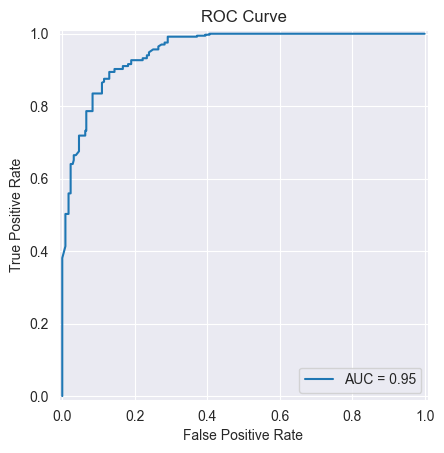

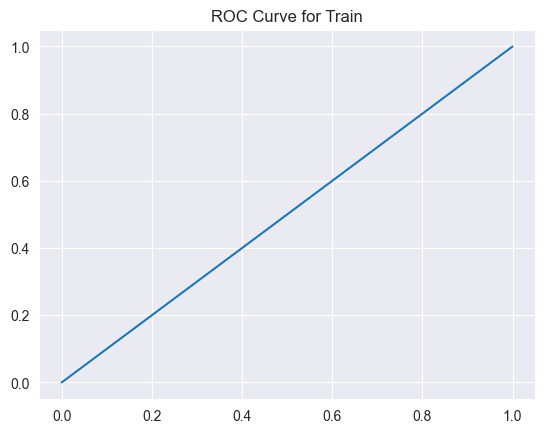

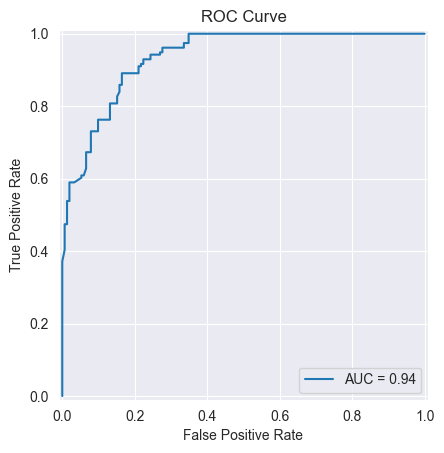

------------------------------------------------------------ 



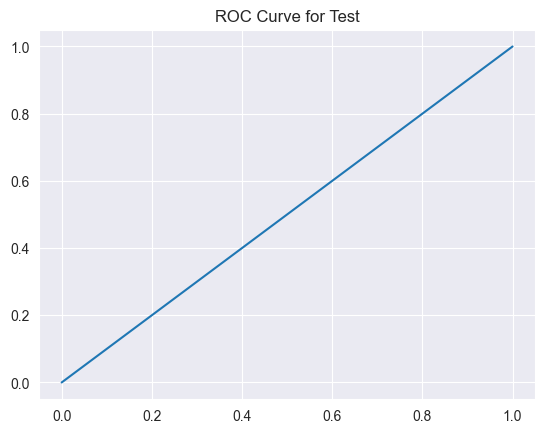

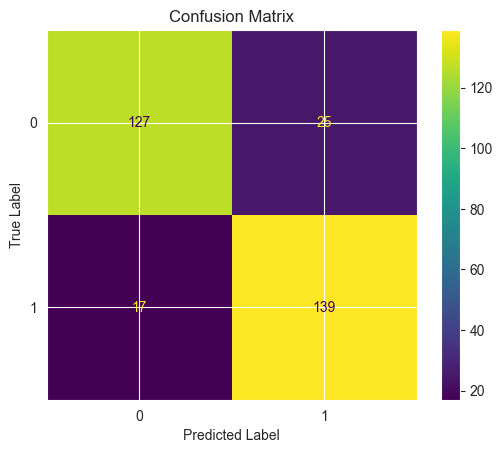

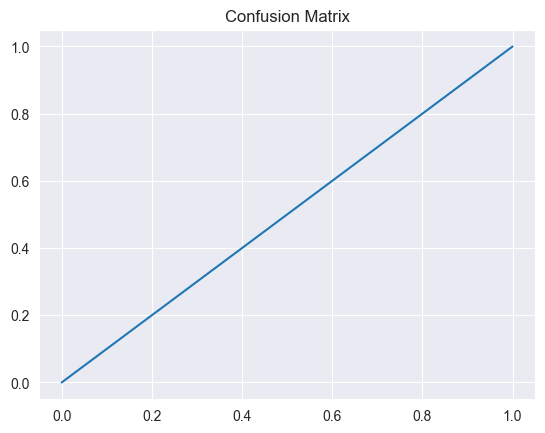

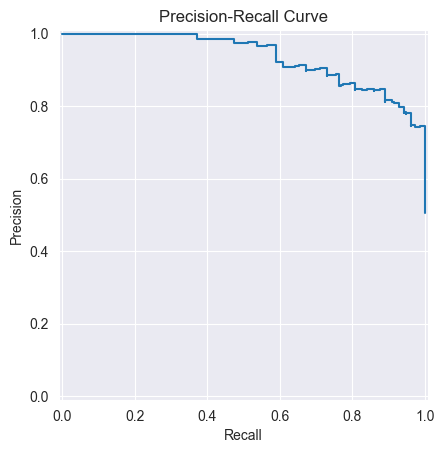

Text(0.5, 1.0, 'Precision Recall Curve')

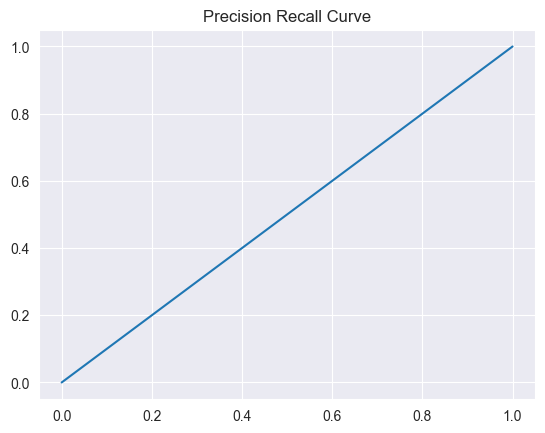

In [92]:
print(classification_report(y_test, ada_predict))

# Confusion Matrix
con_matrix = confusion_matrix(y_test, ada_predict)
print("Confusion Matrix: \n", con_matrix, "\n")

# Accuracy Score
ada_accuracy = accuracy_score(y_test, ada_predict)
print("Accuracy Score: ", ada_accuracy)

# ROC AUC Score
ada_auc = roc_auc_score(y_test, ada_predict)
print("ROC AUC Score: ", ada_auc)

# ROC Curve for Train
plot_roc_curve(final_model_ada, x_train, y_train)
plt.plot([0, 1], [0, 1])
plt.title("ROC Curve for Train")

# ROC Curve for Test
plot_roc_curve(final_model_ada, x_test, y_test)
plt.plot([0, 1], [0, 1])
plt.title("ROC Curve for Test")

# Confusion Matrix
a = "------"
print(a * 10, "\n")
plot_confusion_matrix(final_model_ada, x_test, y_test)
plt.plot([0, 1], [0, 1])
plt.title("Confusion Matrix")

# Precision Recall Curve
plot_precision_recall_curve(final_model_ada, x_test, y_test)
plt.plot([0, 1], [0, 1])
plt.title("Precision Recall Curve")

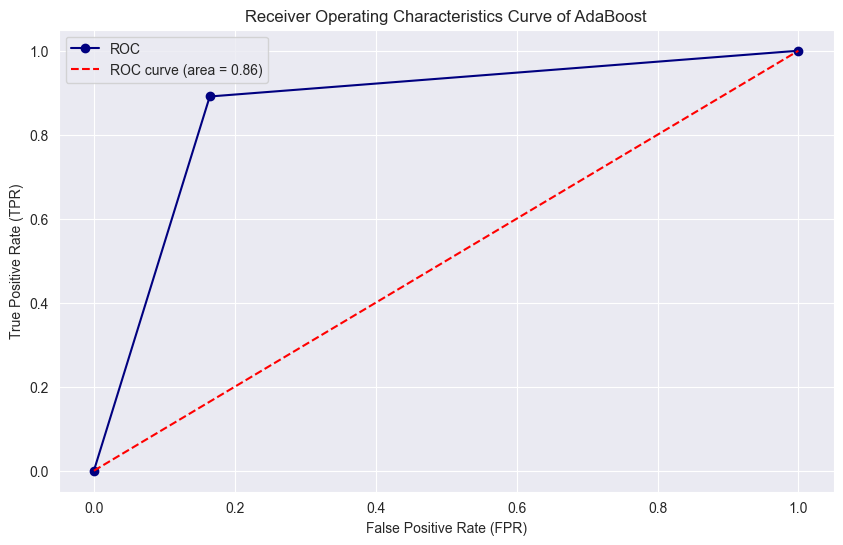

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, ada_predict)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='navy', label='ROC', marker='o')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='ROC curve (area = %0.2f)' % ada_auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristics Curve of AdaBoost')
plt.legend()
plt.show()

## 14.Model Save and Revalidate

In [94]:
final_model_ada = AdaBoostClassifier()  # AdaBoostClassifier instance
final_model_ada.fit(Xtrain, Ytrain)  # Train the model
ada_predict = final_model_ada.predict(Xtest)  # Make predictions
print("Complete AdaBoost Classifier!")  # Output completion message

Complete AdaBoost Classifier!


In [95]:
import pickle

# Define the file path for saving the model
model_ada_filename = 'model_ada.sav'  # Saving in the current directory

# Save the model to disk
try:
    with open(model_ada_filename, 'wb') as file:
        pickle.dump(final_model_ada, file)
    print("Model saved successfully to", model_ada_filename)
except Exception as e:
    print("Error occurred while saving the model:", e)

# Some time later...

# Load the model from disk
try:
    with open(model_ada_filename, 'rb') as file:
        model = pickle.load(file)
    print("Model loaded successfully from", model_ada_filename)
except FileNotFoundError:
    print("File not found:", model_ada_filename)
except Exception as e:
    print("Error occurred while loading the model:", e)


Model saved successfully to model_ada.sav
Model loaded successfully from model_ada.sav


In [96]:
result = model.score(Xtest, Ytest)
print("Final Model Accuracy: ",result)

Final Model Accuracy:  0.9090909090909091


In [97]:
#Prediction Type 1
newdata= pd.DataFrame({'age':52, 'sex':1, 'cp':2, 'trestbps':172, 'chol':199, 'fbs':1, 'restecg':1, 'thalach':162,
                        'exang':0, 'oldpeak':0.5, 'slope':2, 'ca':0, 'thal':3},index=[0])

#prediction1
prediction1 = model.predict(newdata)
newdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,2,172,199,1,1,162,0,0.5,2,0,3


In [98]:
print(prediction1)

if (prediction1[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [99]:
val=Xtest.head(30)
val.head()
Xval=val
Yval=Ytest.head(30)

In [100]:
result3 = model.predict(Xval)
print(result3)

[1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0]


In [101]:
result4 = model.score(Xval, Yval)
print("Final Model Accuracy: ",result4)

Final Model Accuracy:  0.8666666666666667


In [102]:
newdata= pd.DataFrame({'age':52, 'sex':1, 'cp':2, 'trestbps':172, 'chol':199, 'fbs':1, 'restecg':1, 'thalach':162,
                        'exang':0, 'oldpeak':0.5, 'slope':2, 'ca':0, 'thal':3},index=[0])

#prediction2
prediction2 = model.predict(newdata)

print(prediction2)
if (prediction2[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [103]:
# Prediction Type 2
input_data = (62,0,0,160,164,0,0,145,0,6.2,0,3,3)

# change the input data to a numpy array
numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = numpy_array.reshape(1,-1)

#prediction3 
prediction3 = model.predict(input_data_reshaped)
print(prediction3)
if (prediction3[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [104]:
Xtest.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
438,47,1,2,130,253,0,1,179,0,0.0,2,0,2
511,43,1,0,120,177,0,0,120,1,2.5,1,0,3
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3
72,56,1,0,125,249,1,0,144,1,1.2,1,1,2
152,58,1,0,125,300,0,0,171,0,0.0,2,2,3


In [105]:
Ytest.tail(5)

438     1
511     0
1024    0
72      0
152     0
Name: target, dtype: int64

 ## Conclusion

 #### In summary, early detection of heart disease is crucial for saving lives and reducing healthcare costs. Machine learning offers a powerful tool for analyzing medical data and diagnosing illnesses, thanks to the increasing availability of large datasets and the decreasing cost of data storage. Using an AdaBoost Classifier, I built a model using a dataset from The Careerera containing 1054 individuals, both with and without heart disease. The model achieved an accuracy of 87.34% without any hyperparameter tuning, suggesting that the default settings worked best for this dataset. This highlights the potential of machine learning in healthcare, where traditional diagnostic methods may be costly and less efficient. By leveraging big data, machine learning models can provide valuable insights for disease diagnosis and improve patient outcomes.




